In [2]:
# https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-go.html
# 6 7 10
# https://biit.cs.ut.ee/gprofiler/convert
# 이름 entrea id 로 바꾸는 것

# http://asia.ensembl.org/biomart/martview/b7465975b967d7e7f07a190a8c6197fe
# bioMart

In [59]:
# .libPaths('/home/sm/R/x86_64-pc-linux-gnu-library/4.3')
library(clusterProfiler)
library(org.Hs.eg.db)
library(dplyr)

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("org.Hs.eg.db")
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("EnsDb.Hsapiens.v86")

# library(EnsDb.Hsapiens.v86)

In [60]:
# gene <- as.character(read.table('/disk2/kb/sm/PMDA/annotation/data/GO/test/genelist.txt', sep='\t')$V1)
# head(gene)
# 
# d <- read.table('/disk2/kb/sm/PMDA/annotation/data/GO/test/genelist.txt', sep='\t')
a <- read.table('/disk2/kb/sm/bulk/test/output/gene_list_deseq.txt', sep='\t', header=T)
d <- na.omit(a)
head(d)
gene <- d[,6]
# print(gene)
genelist <- d[,2]
names(genelist) <-d[,6]
genelist <- sort(genelist, decreasing = TRUE)
# head(genelist)
# genelist

,baseMean,log2FoldChange,lfcSE,pvalue,padj,NCBI.gene..formerly.Entrezgene..ID,Gene.stable.ID.version,Gene.name,Entreagene.ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2,13.57603,-4.065608,2.4811639,1.527045e-05,0.0146434067,5320,ENSG00000188257.12,PLA2G2A,5320
3,1797.64109,-1.478678,1.1175252,8.584049e-05,0.0548771097,1116,ENSG00000133048.13,CHI3L1,1116
4,59.25332,-3.645630,0.8391624,5.690896e-07,0.0008731542,30845,ENSG00000013016.16,EHD3,30845
5,32.41195,1.070918,1.2977066,2.724247e-04,0.1492789801,55120,ENSG00000115392.13,FANCL,55120
8,39.82032,-5.008632,1.5820328,1.519081e-06,0.0019422714,8641,ENSG00000253953.3,PCDHGB4,8641
9,100.16669,-3.234901,1.9398245,2.562907e-05,0.0231309922,148,ENSG00000120907.18,ADRA1A,148


In [61]:
head(genelist)

7544     23109     51637     79608     55120    374618 
10.207464  3.907823  3.129240  1.682940  1.070918  1.018890

In [62]:
## GO analysis
ggo <- groupGO(gene     = as.character(gene),
               OrgDb    = org.Hs.eg.db,
               ont      = "BP",
               level    = 3,
               readable = TRUE)
head(ggo, 2)

,ID,Description,Count,GeneRatio,geneID
,<chr>,<chr>,<int>,<chr>,<chr>
GO:0019953,GO:0019953,sexual reproduction,1,1/22,FANCL
GO:0019954,GO:0019954,asexual reproduction,0,0/22,


In [63]:
## GO analysis
ego <- enrichGO(gene          = gene,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 1,    # 0.01
                qvalueCutoff  = 1,    # 0.05
                readable      = TRUE)
head(ego, 2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007512,GO:0007512,adult heart development,2/20,13/18870,8.266444e-05,0.0438702,0.02964588,ADRA1A/APLNR,2
GO:0007250,GO:0007250,activation of NF-kappaB-inducing kinase activity,2/20,16/18870,1.269337e-04,0.0438702,0.02964588,CHI3L1/IRAK1,2


In [64]:
write.table(ego,"/disk2/kb/sm/bulk/test/test_pval/GO_ego_deseq.txt",quote = FALSE, row.names = F,sep = "\t")

In [65]:
## gene id ENSEMBL로도 됨
gene.df <- bitr(gene, fromType = "ENTREZID",
        toType = c("ENSEMBL", "SYMBOL"),
        OrgDb = org.Hs.eg.db)

ego2 <- enrichGO(gene         = gene.df$ENSEMBL,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,    # 0.01
                qvalueCutoff  = 0.05)    # 0.05
head(ego2, 2)

'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007512,GO:0007512,adult heart development,2/20,14/21261,7.598643e-05,0.0354815,0.02302043,ENSG00000120907/ENSG00000134817,2
GO:0007250,GO:0007250,activation of NF-kappaB-inducing kinase activity,2/20,16/21261,1.000888e-04,0.0354815,0.02302043,ENSG00000133048/ENSG00000184216,2


In [66]:
## Gene set enrichment analysis
ego3 <- gseGO(geneList     = genelist,
              OrgDb        = org.Hs.eg.db,
              ont          = "BP",
              minGSSize    = 10,   # 100
              maxGSSize    = 500,   # 500
              pvalueCutoff = 1,      # 0.05
              verbose      = FALSE)
head(ego3, 2)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0048519,GO:0048519,negative regulation of biological process,10,-0.6277650,-1.414149,0.1051095,0.6880333,0.6880333,9,"tags=60%, list=41%, signal=65%",148/187/5320/7503/55384/9383
GO:0006807,GO:0006807,nitrogen compound metabolic process,13,0.4502218,1.313132,0.1117825,0.6880333,0.6880333,5,"tags=38%, list=23%, signal=73%",7544/23109/51637/79608/55120


In [67]:
write.table(ego3,"/disk2/kb/sm/bulk/test/test_pval/GSEA_ego3_deseq.txt",quote = FALSE, row.names = F,sep = "\t")

In [21]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("Rgraphviz")

library(Rgraphviz)
# library(SparseM)

Loading required package: graph

Loading required package: grid


Attaching package: ‘Rgraphviz’


The following objects are masked from ‘package:IRanges’:

    from, to


The following objects are masked from ‘package:S4Vectors’:

    from, to





groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Building most specific GOs .....

	( 1173 GO terms found. )


Build GO DAG topology ..........

	( 1173 GO terms and 2359 relations. )


Annotating nodes ...............

	( 18614 genes annotated to the GO terms. )



$dag
A graphNEL graph with directed edges
Number of Nodes = 68 
Number of Edges = 132 

$complete.dag
[1] "A graph with 68 nodes."


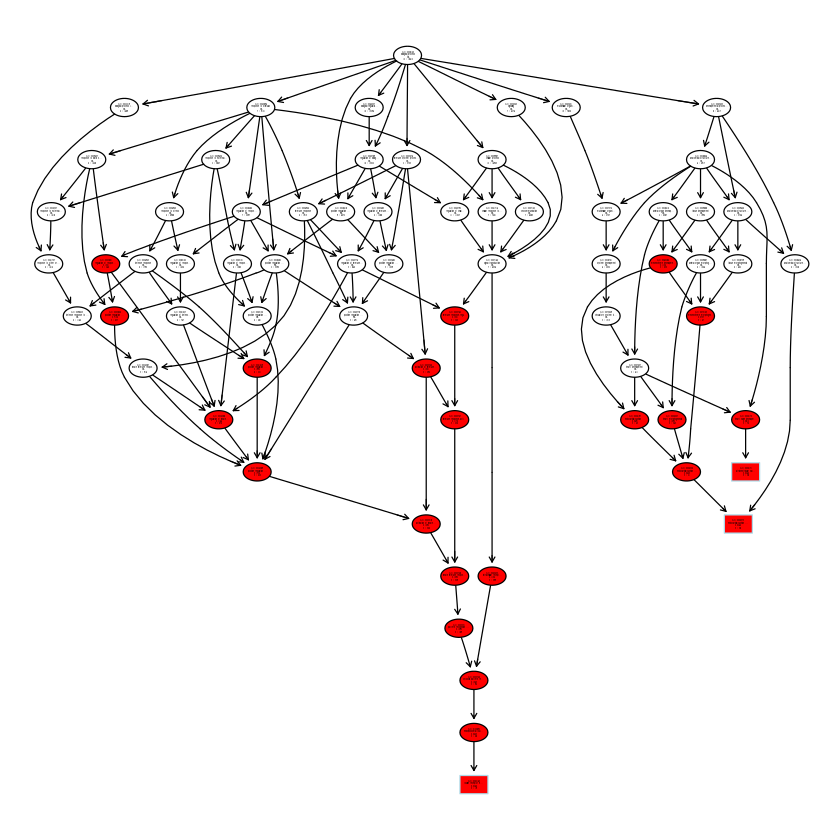

In [96]:
plotGOgraph(ego)

Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


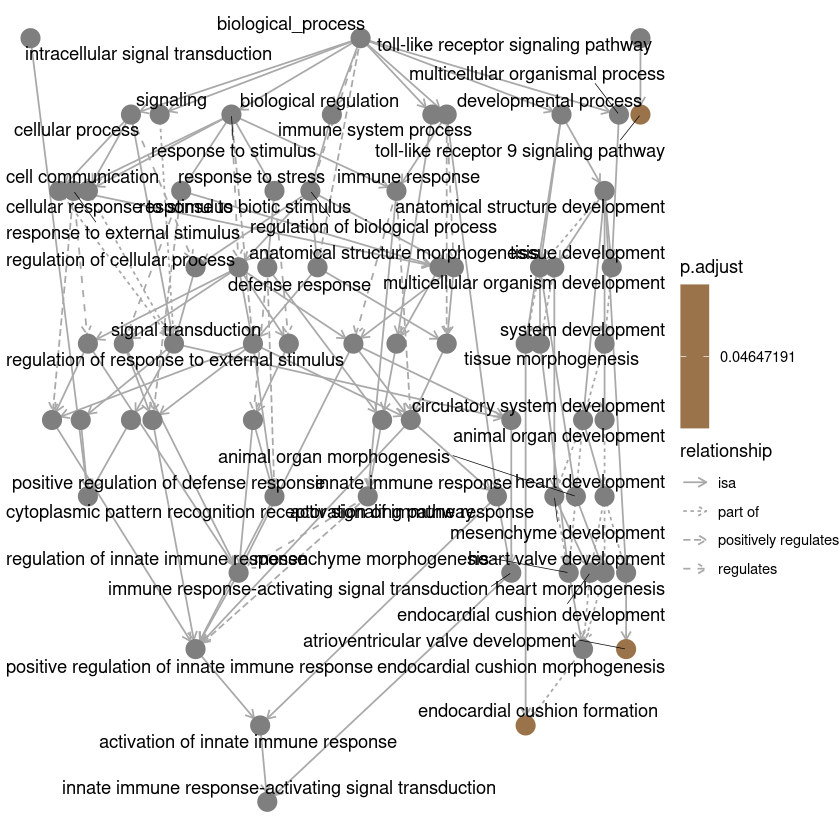

In [97]:
goplot(ego)

In [16]:
## 7

In [98]:
library(clusterProfiler)
search_kegg_organism('ece', by='kegg_code')
ecoli <- search_kegg_organism('Escherichia coli', by='scientific_name')
head(ecoli, 2)

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
759,ece,Escherichia coli O157:H7 EDL933,EHEC
4991,ecec,Enterococcus cecorum,Enterococcus cecorum


,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
754,eco,Escherichia coli K-12 MG1655,Escherichia coli K-12 MG1655
755,ecj,Escherichia coli K-12 W3110,Escherichia coli K-12 W3110


In [99]:
## KEGG analysis
kk <- enrichKEGG(gene         = gene,
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)
head(kk, 2)

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [49]:
## KEGG enrichment analysis
kk2 <- gseKEGG(geneList     = genelist,
               organism     = 'hsa',
               minGSSize    = 120,
               pvalueCutoff = 0.05,
               verbose      = FALSE)
head(kk2)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
no term enriched under specific pvalueCutoff...



ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [50]:
## KEGG method analysis(머가 다른지 모르겠음 찾아봐야함)
mkk <- enrichMKEGG(gene = gene,
                   organism = 'hsa',
                   pvalueCutoff = 1,
                   qvalueCutoff = 1)
head(mkk)          

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/module"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/module"...

--> No gene can be mapped....

--> Expected input gene ID: 6389,6391,8789,1743,5232,3098

--> return NULL...



NULL

In [51]:
## KEGG method enrichment analysis(머가 다른지 모르겠음 찾아봐야함)
mkk2 <- gseMKEGG(geneList = genelist,
                 organism = 'hsa',
                 pvalueCutoff = 1)
head(mkk2)

preparing geneSet collections...

--> Expected input gene ID: 5230,7086,2027,3419,5315,7086



ERROR: Error in check_gene_id(geneList, geneSets): --> No gene can be mapped....


In [22]:
## 웹에서 보는 것
browseKEGG(kk, 'hsa00280')

In [17]:
## 그림으로 보는건데
library("pathview")
hsa05323 <- pathview(gene.data  = genelist,
                     pathway.id = "hsa05323",
                     species    = "hsa",
                     limit      = list(gene=max(abs(genelist)), cpd=1))

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /disk2/kb/sm/PMDA/annotation/data/GO/test

Info: Writing image file hsa05323.pathview.png



In [52]:
# https://avocadaon.tistory.com/32
kk <- enrichKEGG(gene=gene, organism='hsa',pvalueCutoff = 0.05)

# dotplot(kk)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [ ]:
## 10

In [54]:
library(DOSE)

In [68]:
## Disease Ontology analysis
x <- enrichDO(gene          = gene,
              ont           = "DO",
              pvalueCutoff  = 1, # 0.05
              pAdjustMethod = "BH",
              universe      = names(genelist),
              minGSSize     = 10,    # 100
              maxGSSize     = 500,  # 500
              qvalueCutoff  = 1, # 0.05
              readable      = FALSE)
head(x)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
DOID:14566,DOID:14566,disease of cellular proliferation,10/14,10/14,1,1,1,5320/1116/55120/148/657/4256/8788/55384/7503/3654,10
DOID:162,DOID:162,cancer,10/14,10/14,1,1,1,5320/1116/55120/148/657/4256/8788/55384/7503/3654,10
DOID:4,DOID:4,disease,14/14,14/14,1,1,1,5320/1116/55120/148/657/79608/187/4256/23109/8788/55384/4983/7503/3654,14
DOID:7,DOID:7,disease of anatomical entity,13/14,13/14,1,1,1,5320/1116/55120/148/657/79608/187/4256/23109/8788/55384/7503/3654,13


In [69]:
write.table(x,"/disk2/kb/sm/bulk/test/test_pval/DO_x_deseq.txt",quote = FALSE, row.names = F,sep = "\t")

In [55]:
## Network of Cancer Genes database
ncg <- enrichNCG(gene)
head(ncg)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
lung_cancer_(all_histologies),lung_cancer_(all_histologies),lung_cancer_(all_histologies),1/1,93/3177,0.0292729,0.0292729,NA,187,1


In [56]:
## DisGeNET
dgn <- enrichDGN(gene)
head(dgn, 2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
C0242526,C0242526,"Gonadal Dysgenesis, 45,X",2/13,23/21671,8.344887e-05,0.04811504,0.027899,7544/7503,2
C0432475,C0432475,XX males,2/13,32/21671,1.631018e-04,0.04811504,0.027899,7544/7503,2


In [21]:
## snp도 들어감 이건 예시다
snp <- c("rs1401296", "rs9315050", "rs5498", "rs1524668", "rs147377392",
         "rs841", "rs909253", "rs7193343", "rs3918232", "rs3760396",
         "rs2231137", "rs10947803", "rs17222919", "rs386602276", "rs11053646",
         "rs1805192", "rs139564723", "rs2230806", "rs20417", "rs966221")
dgnv <- enrichDGNv(snp)
head(dgnv, 2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
C0010054,C0010054,Coronary Arteriosclerosis,6/17,440/194515,1.568917e-12,2.761295e-10,NA,rs5498/rs147377392/rs11053646/rs1805192/rs2230806/rs20417,6
C0151744,C0151744,Myocardial Ischemia,4/17,103/194515,1.754840e-10,1.544259e-08,NA,rs5498/rs147377392/rs11053646/rs1805192,4


In [70]:
## Disease Ontology enrichment analysis
y <- gseDO(genelist,
           minGSSize     = 1, # 120
           pvalueCutoff  = 1, # 0.2
           pAdjustMethod = "BH",
           verbose       = FALSE)
dim(y)

[1] 266  11

In [71]:
write.table(y,"/disk2/kb/sm/bulk/test/test_pval/DOEA_y_deseq.txt",quote = FALSE, row.names = F,sep = "\t")

In [ ]:
유전자 집합 분석의 일종으로, 각각의 특성과 목적이 다릅니다.


Gene Ontology (GO) Analysis:
목적: 유전자의 생물학적 기능과 프로세스, 세포 구성 등을 이해하기 위해 사용됩니다.
포커스: GO analysis는 Biological Process, Molecular Function, Cellular Component 등의 카테고리로 유전자들을 분류합니다.
예시: 특정 실험에서 어떤 Biological Process가 활성화되거나, 어떤 Molecular Function이 영향을 받는지 등을 알려줍니다.

Kyoto Encyclopedia of Genes and Genomes (KEGG) Analysis:
목적: 세포와 생물체에서 발생하는 생물학적 경로를 이해하고, 특히 유전자와 단백질의 기능을 고려한 분석을 수행합니다.
포커스: KEGG analysis는 특정 생물학적 경로에서 어떤 유전자 또는 단백질이 활성화되거나 억제되는지를 보여줍니다.
예시: 대사 경로, 신호전달 경로 등에서 어떤 유전자들이 특별한 역할을 하는지 등을 파악할 수 있습니다.

Disease Ontology (DO) Analysis:
목적: 유전자들이 특정 질병 또는 의학적인 조건과 어떻게 연관되어 있는지를 이해하고자 할 때 사용됩니다.
포커스: DO analysis는 유전자와 질병 간의 관련성을 파악하고, 특정 질병과 연관된 유전자를 찾는 데 사용됩니다.
예시: 특정 유전자들이 어떤 질병과 연관되어 있는지를 파악하여 질병의 발생 기전을 이해하거나, 치료 대상을 찾는 데 활용될 수 있습니다.


공통점:
이러한 분석들은 유전자 또는 단백질 집합에 통계적으로 유의미한 특징을 부여하여 실험 결과를 이해하고 해석하는 데 도움을 줍니다.
Biological Process, 경로웨이, 질병 등의 유전자 집합을 대상으로 합니다.

차이점:
GO는 생물학적 특성과 기능에 중점을 둠.
KEGG는 생물학적 경로에 중점을 둠.
DO는 질병과 유전자 간의 연관성에 중점을 둠.


이러한 분석들은 생물학적 연구에서 실험 결과를 보다 폭넓게 이해하고, 유전자나 단백질의 기능과 상호 작용에 대한 통찰을 얻는 데 도움을 줍니다.

In [126]:
write.table(kk,"/disk2/kb/sm/bulk/test/output/KEGG_analysis_kk.txt",quote = FALSE, row.names = F,sep = "\t")

write.table(y,"/disk2/kb/sm/bulk/test/output/DO_enrich_analysis_y.txt",quote = FALSE, row.names = F,sep = "\t")

In [3]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks clusterProfiler::filter(), stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename(), clusterProfiler::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate:

In [42]:
y_df <- data.frame(y)

In [43]:
p <- ggplot(y_df, aes(x=reorder(Description, -p.adjust), y=-log(p.adjust)))+
  geom_bar(position='identity', stat = "identity", size=.2, width=0.7, fill=adjustcolor('#855624',alpha.f = 0.80)) +
  # scale_y_date() +
  # scale_y_continuous(limits = c(0, 9000000000), breaks = seq(0, 9000000000, 1000000000), labels = paste0(seq(0, 9), 'GB'), position='right') +
  labs(title = '\nDisease Ontology analysis only KORV2\n',
    y = '-log10(p-value)') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=15),
    axis.text.y = element_text(size=15),
    plot.title = element_text(hjust = 0.5,size=22,face='bold'),
    axis.title.x = element_text(size=20),
    axis.title.y = element_blank(),
    legend.text = element_text(size=10),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey50"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "gray80"), 
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(), 
    legend.title = element_blank()
    ) +
  # scale_fill_manual(values=adjustcolor(c('#c2884a', '#3F2305', '#855624'),alpha.f = 0.80)) +
  # geom_text(aes(label=paste0(round(Total.bases.bp./1000000000, 2), 'GB')), vjust=0.45, hjust=-0.2, color='#042591', size=3) +
  coord_flip()
#   scale_colour_manual(values=c('#ff4040')) 
# ggsave(p, file='/disk2/kb/sm/chip/plot/final/total.png', width=2833, height=1890, units='px')
ggsave(p, file='/disk2/kb/sm/bulk/test/output/DO.png', width=12000, height=8000, units='px', dpi=1000)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [44]:
y_df$GeneRatio <- (str_count(y_df$core_enrichment, '/')+1)/y_df$setSize
head(y_df, 2)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment,GeneRatio
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
DOID:1289,DOID:1289,neurodegenerative disease,2,-0.9166667,-1.544521,0.05704698,0.05704698,0.9608725,4,"tags=100%, list=29%, signal=83%",55384,0.5
DOID:331,DOID:331,central nervous system disease,2,-0.9166667,-1.544521,0.05704698,0.05704698,0.9608725,4,"tags=100%, list=29%, signal=83%",55384,0.5


In [45]:
p <- ggplot(y_df, aes(x=reorder(Description, GeneRatio), y=GeneRatio))+
  geom_bar(position='identity', stat = "identity", size=.2, width=0.7, fill=adjustcolor('#855624',alpha.f = 0.80)) +
  # scale_y_date() +
  # scale_y_continuous(limits = c(0, 9000000000), breaks = seq(0, 9000000000, 1000000000), labels = paste0(seq(0, 9), 'GB'), position='right') +
  labs(title = '\nDisease Ontology analysis only KORV2\n',
    y = 'GeneRatio') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=15),
    axis.text.y = element_text(size=15),
    plot.title = element_text(hjust = 0.5,size=22,face='bold'),
    axis.title.x = element_text(size=20),
    axis.title.y = element_blank(),
    legend.text = element_text(size=10),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey50"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "gray80"), 
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(), 
    legend.title = element_blank()
    ) +
  # scale_fill_manual(values=adjustcolor(c('#c2884a', '#3F2305', '#855624'),alpha.f = 0.80)) +
  # geom_text(aes(label=paste0(round(Total.bases.bp./1000000000, 2), 'GB')), vjust=0.45, hjust=-0.2, color='#042591', size=3) +
  coord_flip()
#   scale_colour_manual(values=c('#ff4040')) 
# ggsave(p, file='/disk2/kb/sm/chip/plot/final/total.png', width=2833, height=1890, units='px')
ggsave(p, file='/disk2/kb/sm/bulk/test/output/DO_test.png', width=12000, height=8000, units='px', dpi=1000)

In [46]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(dplyr)

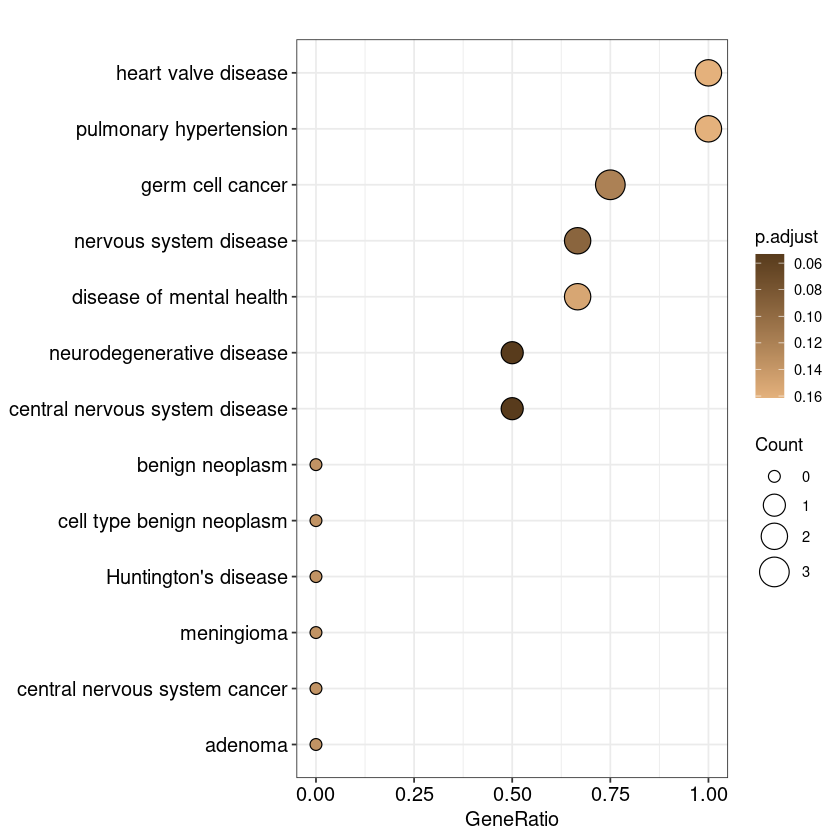

In [50]:
y <- gseDO(genelist,
           minGSSize     = 1, # 120
           pvalueCutoff  = 0.2, # 0.2
           pAdjustMethod = "none",    # BH
           verbose       = FALSE)
options(enrichplot.colours = c("#583b1c", "#e4b17c"))
dotplot(y, showCategory = 15) # , x='p.adjust'

In [122]:
y_plot <- y[1:20, ]

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(edge = your_value)' instead of 'colorEdge'.
 The colorEdge parameter will be removed in the next version.”
Scale for size is already present.

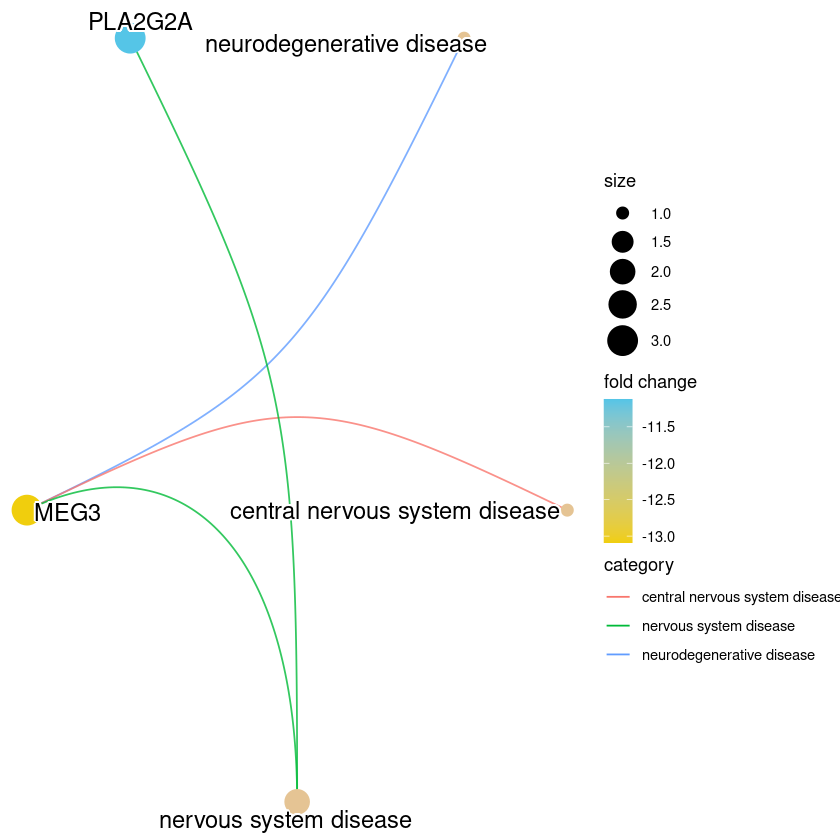

In [123]:
## convert gene ID to Symbol
options(enrichplot.colours = c("#f0ce0d", "#55c5e7"))
edox <- setReadable(y, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=genelist, showCategory = 3)
## categorySize can be scaled by 'pvalue' or 'geneNum'

p2 <- cnetplot(edox, categorySize="pvalue", foldChange=genelist, showCategory = 3)
p3 <- cnetplot(edox, foldChange=genelist, circular = TRUE, colorEdge = TRUE, showCategory = 3)
# cowplot::plot_grid(p1, p2, p3, ncol=3, labels=LETTERS[1:3], rel_widths=c(.8, .8, 1.2))
p3